# <font color=darkcyan> Multivariate linear regression - Kernel regression </font>

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
from matplotlib import colors 
from sklearn.metrics import mean_squared_error

A function $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ is said to be a positive semi-definite kernel if and only if it is symmetric and if for all $n\geqslant 1$, $(x_1,\ldots,x_n)\in(\mathbb{R}^d)^n$ and all $(a_1,\ldots,a_n)\in\mathbb{R}^n$,
$$
\sum_{1\leqslant i,j\leqslant n}a_ia_jk(x_i,x_j) \geqslant 0\,.
$$

The following functions, defined on $\mathbb{R}^d\times\mathbb{R}^d$, are positive semi-definite kernels:

$$
k:(x,y)\mapsto x^Ty \quad\mathrm{and}\quad k:(x,y)\mapsto \mathrm{exp}\left(-\|x-y\|^2/(2\sigma^2\right)\,,\; \sigma>0\,.
$$


Let $\mathcal{F}$ be a Hilbert space of functions $f:\mathbb{R}^d\to\mathbb{R}$. A symmetric function $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ is said to be a reproducing kernel of $\mathcal{F}$ if and only if:

1. for all $x\in\mathbb{R}^d$, $k(x,\cdot)\in\mathcal{F}$ ; 

2. for all $x\in\mathbb{R}^d$ and all $f\in\mathcal{F}$, $\langle f; k(x,\cdot)\rangle_\mathcal{F} = f(x)$ . 

The space $\mathcal{F}$ is said to be a reproducing kernel Hilbert space with kernel $k$.



Let $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ be a positive definite kernel and $\mathcal{F}$ the RKHS with kernel $k$. Then, 

$$
\widehat f^n_{\mathcal{F}} \in \underset{f\in\mathcal{F}}{\mathrm{min}}\;\frac{1}{n}\sum_{i=1}^n (Y_i - f(X_i))^2 + \lambda\|f\|_\mathcal{F}^2\,,
$$

where $\|f\|^2_\mathcal{F} = \langle f\,;\, f\rangle_\mathcal{F}$, is given by $\widehat f^n_{\mathcal{F}} : x \mapsto \sum_{i=1}^n \widehat \alpha_i k(X_i,x)$, where

$$
\widehat\alpha \in \underset{\alpha \in (\mathbb{R}^d)^n}{\mathrm{argmin}}\;\left\{\frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \sum_{1\leqslant i,j \leqslant n}\alpha_i \alpha_j k(X_i,X_j) = \frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \alpha^TK\alpha\right\}\,,
$$

where for all $1\leqslant i,j\leqslant n$, $K_{i,j} = k(X_i,X_j)$.

In practice, once the matrix $K$ is built, kernel ridge regression boils down to solving this optimization problem to obtain $\widehat \alpha$. Then, the estimated function $\widehat f^n_{\mathcal{F}}$ is a mixture of kernels evaluated at each data points with weights given by $\alpha$.

<font color=darkred> Provide the value of $\widehat \alpha$ as a function of $n$, $\lambda$, $K$ and  $Y$.</font>

#### Import data

In [2]:
import pandas as pd

Data frames can be imported using pandas. This provides two-dimensional and heterogeneous tabular data.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

<font color=darkred>
    
Import data in the file BRinf using ``read_csv``, display the first rows with ``head`` and the shape of the dataframe using ``shape``.
</font>

In [90]:
# In this section, multivariate linear regression is used to predic the Brazilian inflation based on
# many observed variables, see https://github.com/gabrielrvsc/HDeconometrics/
df = pd.read_csv('BRinf.csv')
df.head()

,Unnamed: 0,Brazil CPI IPCA MoM,FGV Brazil General Prices IGP-,FGV Brazil General Prices IGP-.1,FGV Brazil General Prices IGP-.2,FGV Brazil General Prices IGP-.3,Brazil CPI IPCA Median Market,Brazil Total Electricity Consu,Brazil Industrial Electricity,BofA Merrill Lynch Economic Co,...,X5t.12,X5t.13,fmed2,fmean,fmean2,fdp,lfmed2,lfmean,lfmean2,lfdp
0,2003-01-31,2.25,2.33,2.17,5.816,2.29,11.56,25422.0,-359,-1.47,...,0.80,0.68,4.0000,1.96,3.8416,0.18,1.3225,1.15,1.3225,0.24
1,2003-02-28,1.57,2.28,1.59,4.351,2.42,10.95,25163.0,-303,-1.21,...,0.68,0.48,2.5600,1.60,2.5600,0.26,0.7569,0.91,0.8281,0.27
2,2003-03-31,1.23,1.53,1.66,4.593,1.58,9.58,24960.0,115,-0.35,...,0.55,0.50,0.8836,0.93,0.8649,0.13,0.4900,0.73,0.5329,0.17
3,2003-04-30,0.97,0.92,0.41,1.173,1.24,8.88,25284.0,93,-0.15,...,0.45,0.78,1.0000,0.97,0.9409,0.14,0.2500,0.52,0.2704,0.18
4,2003-05-31,0.61,-0.26,-0.67,-1.860,0.02,8.22,24785.0,285,-0.47,...,0.60,0.43,0.2500,0.50,0.2500,0.10,0.3025,0.55,0.3025,0.15


In [67]:
# number of observations, number of variables
df.shape

(156, 93)

In [91]:
# first coordinate is the number of samples
# second coordinate is the number of input features (+ 1 for the observations)
X = df.iloc[:,2:]
Y = df.iloc[:,1] 

<font color=darkred>
    
Divide the input data ``X`` and observations ``Y`` into training and test sets using the ``train_test_split`` method. This method randomly splits arrays or matrices into training and test subsets. It allows to train several times a model with different training set and analyze the variability of the performance on the test set.
</font>

In [92]:
from sklearn.model_selection import train_test_split

In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1)
np.shape(Y_train)
print(type(X_train))

<class 'pandas.core.frame.DataFrame'>


<font color=darkred>
    
Use the ``StandardScaler`` of sklearn to preprocess the input variables.
</font>

``StandardScaler`` standardizes the input variables by removing the mean and scaling to unit variance.
We will not analyze closely standardization in this course. However, it is often very useful (even mandatory in some cases) for the stability of learning procedures.
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


<class 'numpy.ndarray'>


In [65]:
np.shape(X_train), np.shape(X_test)

((140, 91), (16, 91))

#### Kernel Regression from scractch

<font color=darkred>

Write a ``linear_kernel`` function with the arguments two vectors ``x`` and ``y``, which returns the result of the linear kernel function defined as $k:(x,y)\mapsto x^Ty$.
</font>

In [85]:
def linear_kernel(x,y):
    return x.T @ y

<font color=darkred>

Write a ``rbf_kernel`` function with the arguments two vectors ``x`` and ``y`` and a scalar ``sigma``, which returns the result of the radial basis function (RBF) kernel defined as $k:(x,y)\mapsto \mathrm{exp}\left(-\|x-y\|^2 /\left(2\sigma^2\right)\right)$.
</font>

In [102]:
def rbf_kernel (x, y, sigma) :
    return np.exp(-np.linalg.norm(x-y)**2/(2*sigma**2))

<font color=darkred>

Write a ``kernel_ridge_regression`` function with arguments the data ``X`` and ``y``, the kernel matrix ``K`` and a penalty parameter ``lambda``. The function returns the parameter estimate $\widehat \alpha$.
</font>

In [59]:
def kernel_ridge_regression(X, y, K, lambda_para):
    n = X.shape[0]
    alpha_hat = np.linalg.inv(K + (n* lambda_para * np.eye(n))) @ y
    
    return alpha_hat

<font color=darkred>
    Run the algorithm with several values of $\lambda$ using X_train and Y_train and compute MSE obtained on the test set.
    </font>

In [ ]:
lambda_values =  [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0]
sigma_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]

<class 'pandas.core.frame.DataFrame'>


In [106]:
#LINEAR KERNEL

n_train = X_train.shape[0]
n_test = X_test.shape[0]
results_lin = []

#Calcul de la matrice K
K_linear =  np.zeros((n,n))
for i in range(n_train):
    for j in range(n_train):
        K_linear[i,j] = linear_kernel(X_train[i], X_train[j])

for lambda_val in lambda_values:
    #Calcul de alpha hat
    alpha_hat = kernel_ridge_regression (X_train, Y_train, K_linear, lambda_val)

    #Prediction sur test
    Y_pred = np.zeros(n_test)
    for i in range(n_test):
        for j in range (n_train):
            Y_pred[i] += alpha_hat[j] * linear_kernel(X_train[j], X_test[i])
    
    #MSE
    mse = mean_squared_error(Y_test, Y_pred)
    results_lin.append((lambda_val, mse))

In [127]:
#RBF KERNEL

n_train = X_train.shape[0]
n_test = X_test.shape[0]
results_rbf = []
sigma = 5
#Calcul de la matrice K
K_rbf =  np.zeros((n,n))
for i in range(n_train):
    for j in range(n_train):
        K_rbf[i,j] = rbf_kernel(X_train[i], X_train[j], sigma)

for lambda_val in lambda_values:
    #Calcul de alpha hat
    alpha_hat = kernel_ridge_regression (X_train, Y_train, K_rbf, lambda_val)

    #Prediction sur test
    Y_pred = np.zeros(n_test)
    for i in range(n_test):
        for j in range (n_train):
            Y_pred[i] += alpha_hat[j] * rbf_kernel(X_train[j], X_test[i], sigma)

    #MSE
    mse = mean_squared_error(Y_test, Y_pred)
    results_rbf.append((lambda_val, mse))


#### Kernel Regression with Sklearn

In [15]:
from sklearn.kernel_ridge import KernelRidge

<font color=darkred>
    
Fit a ``KernelRidge`` from sklearn to train a kernel regression model, display the parameter estimate $\widehat \alpha$ and compute the MSE obtained on the test set.
</font>

In [128]:
kr = KernelRidge()
results_kr = []

for lambda_val in lambda_values:
    kr = KernelRidge(alpha=lambda_val, kernel='linear')
    kr.fit(X_train, Y_train)
    
    #Alpha hat
    alpha_hat = kr.dual_coef_

    #Prédire les valeurs de Y_test
    Y_pred = kr.predict(X_test)
    
    #MSE
    mse = mean_squared_error(Y_test, Y_pred)
    
    results_kr.append((lambda_val, mse))

#Affichage résultats
for lambda_val, mse in results_kr:
    print(f"Pour lambda = {lambda_val}, le MSE = {mse}")

Pour lambda = 0.001, le MSE = 0.2623600079385747
Pour lambda = 0.002, le MSE = 0.24958313790908676
Pour lambda = 0.005, le MSE = 0.22634210689408213
Pour lambda = 0.01, le MSE = 0.2086427930368827
Pour lambda = 0.02, le MSE = 0.19520156000559163
Pour lambda = 0.05, le MSE = 0.18464881385195409
Pour lambda = 0.1, le MSE = 0.18007976288801306
Pour lambda = 0.2, le MSE = 0.17789469993377324
Pour lambda = 0.5, le MSE = 0.18274693263311798
Pour lambda = 1.0, le MSE = 0.19370346841298602
Pour lambda = 2.0, le MSE = 0.20226165236306207


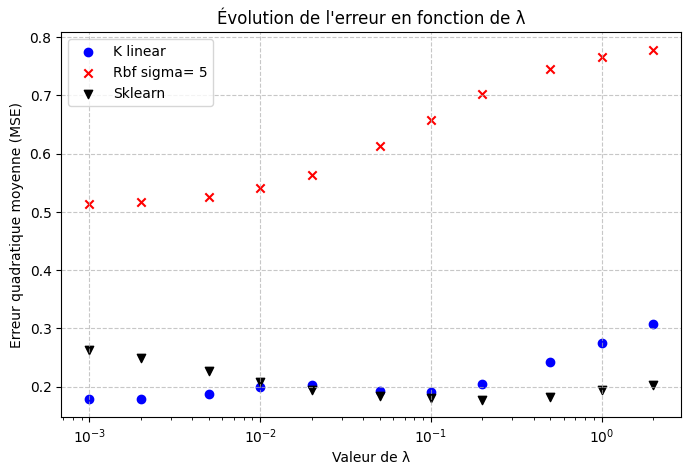

In [133]:
#VISUALISATION

plt.figure(figsize=(8, 5))

#Linear
x = [lambda_val for lambda_val, _ in results_lin]
y = [mse for _, mse in results_lin]
plt.scatter(x, y, color="blue", marker="o", label="K linear")

#Rbf
y = [mse for _, mse in results_rbf]
plt.scatter(x, y, color="red", marker="x", label=f"Rbf sigma= {sigma}")

#SK linear
y = [mse for _, mse in results_kr]
plt.scatter(x, y ,color="black",marker= 'v', label="Sklearn")

#Pour la beauté
plt.xlabel("Valeur de λ")
plt.ylabel("Erreur quadratique moyenne (MSE)")
plt.title("Évolution de l'erreur en fonction de λ")
plt.xscale('log')
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)

# Afficher le graphique
plt.show()

#### Cross Validation

<font color=darkred>
    
Implement a grid search from scratch for the given ``KernelRidge`` model with radial basis function (RBF) kernel and hyperparameter ``alpha``. Create a new training dataset (X_train, Y_train) and a validation dataset (X_val, Y_val) using the actual (X_train, Y_train) datasets. Write a function that performs grid search to find the best value of ``alpha`` and displays the best hyperparameter along with the corresponding validation MSE.
</font>

In [134]:
model = KernelRidge(kernel='rbf', gamma=0.1)

# Validation set
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)


# Définir les valeurs de alpha et sigma
alpha_values = [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0]
sigma_values = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0]

def grid_search_kernel_ridge(X_train, Y_train, X_val, Y_val, alpha_values, sigma_values):
    best_alpha = None
    best_sigma = None
    best_mse = float('inf')
    
    for sigma in sigma_values:
        for alpha in alpha_values:
            # Créer et ajuster le modèle KernelRidge avec noyau RBF
            kr = KernelRidge(alpha=alpha, kernel='rbf', gamma=1/(2*sigma**2))
            kr.fit(X_train, Y_train)
            
            # Prédire les valeurs de Y_val
            Y_pred = kr.predict(X_val)
            
            # Calculer le MSE
            mse = mean_squared_error(Y_val, Y_pred)
            
            # Vérifier si c'est le meilleur MSE
            if mse < best_mse:
                best_mse = mse
                best_alpha = alpha
                best_sigma = sigma
    
    print(f"Meilleur alpha : {best_alpha}")
    print(f"Meilleur sigma : {best_sigma}")
    print(f"Meilleur MSE de validation : {best_mse}")

# Exécuter la recherche en grille
grid_search_kernel_ridge(X_train, Y_train, X_val, Y_val, alpha_values, sigma_values)

Meilleur alpha : 0.1
Meilleur sigma : 10.0
Meilleur MSE de validation : 0.012248373923465892


<font color=darkred>
    
Implement a grid search using either ``GridSearchCV`` or ``RandomizedSearchCV`` for the given ``KernelRidge`` model with a radial basis function (RBF) kernel and hyperparameters ``alpha`` and ``gamma``. Display the optimal hyperparameters along with the corresponding validation MSE.
    
</font>

In [135]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [136]:
param_grid = {
    'alpha': [0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0],
    'gamma': np.logspace(-2, 2, 5)
}

kr = KernelRidge(kernel='rbf')

# Utiliser GridSearchCV pour trouver les meilleurs hyperparamètres
grid_search = GridSearchCV(kr, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(X_train, Y_train)

# Afficher les meilleurs hyperparamètres et le MSE de validation correspondant
best_params = grid_search.best_params_
best_mse = -grid_search.best_score_

print(f"Meilleurs hyperparamètres : {best_params}")
print(f"Meilleur MSE de validation : {best_mse}")


Meilleurs hyperparamètres : {'alpha': 0.001, 'gamma': 0.01}
Meilleur MSE de validation : 0.056937900126797135


#### Ridge vs Lasso

In [15]:
from sklearn.linear_model import Lasso, Ridge

In [16]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# Ignore ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)

<font color=darkred>
Create a np array with several values of the penalty parameter (called $\alpha$ in Python)
</font>

In [17]:
n_alphas = 100
alphas = np.logspace(-10, 3, n_alphas)

<font color=darkred>
Use the ``fit`` function of sklearn to fit a Lasso and Ridge model with for each value of $\alpha$. 
    
Store the estimated parameter, the number of zeros in the estimated parameter and the MSE on the test set after each training.
</font>

<font color=darkred>
Display the estimated parameters as a function of the penalty parameter.
</font>

<font color=darkred>
Display the number of zero coefficients of the estimated parameter as a function of the penalty parameter.
</font>

<font color=darkred>
Display the MSE on the test set as a function of the penalty parameter.
</font>